# Data Argumentation
Un problema común es la cantidad de datos disponibles para ingresar a los modelos, para que los modelos presenten los resultados esperados es necesario que el entrenamiento ocurra con una gran cantidad de datos (conjunto de datos), pero en muchos casos los datos necesarios para realizar estas tareas no está disponible.
Aquí es donde entra en juego la técnica ** Aumento de datos ** que, como su nombre indica, nos permite aumentar nuestro conjunto de datos de dos maneras:




*   ntroduciendo alteraciones en los datos originales. Por ejemplo: tomando una imagen original centrada, la replicamos descentrada, invirtiendo ejes…
* Utilizando diferentes distribuciones. Ejemplo: si queremos entrenar un modelo para clasificar imágenes de alta resolución, añadimos imágenes de baja resolución, con ruido… manteniendo siempre el ratio de alta resolución más alto.



Al principio, las redes neuronales no son inteligentes. Por ejemplo, una red neuronal mal entrenada pensaría que estas tres pelotas de tenis que se muestran a continuación son imágenes distintas y únicas.

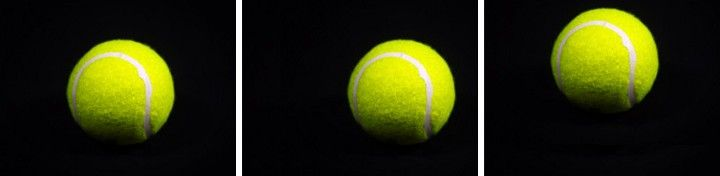



La misma pelota con algunas traducciones.




Entonces, si trabajamos con imágenes, solo es necesario hacer algunas pequeñas alteraciones en nuestro conjunto de datos y podemos lograr nuestro objetivo.
Hay muchas formas de aumentar los datos con imágenes, como:


1. Dar la vuelta (voltear)
2. Rotación

1. Escala
2. Recorte

1. Traducción
2. Ruido gaussiano








La biblioteca de Keras brinda la capacidad de usar el aumento de datos automáticamente al entrenar un modelo. Esto se logra mediante el uso de la clase ImageDataGenerator. Se admiten una variedad de técnicas, así como métodos de escalado de píxeles, como:

Los cambios en la imagen (traducciones) a través de los argumentos width_shift_range y height_shift_range.
Dando la vuelta a la imagen usando los argumentos horizontal_flip y vertical_flip.
Rotaciones de imágenes a través del rango de rotación del argumento
Brillo de imagen usando el argumento rango_brillo.
Zoom de imagen usando el argumento zoom_range.
Veamos de forma independiente ejemplos de imágenes después de que hayan sido ampliadas. Es común utilizar una variedad de técnicas de aumento al mismo tiempo durante el entrenamiento.


In [2]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

busca una imagen de internet

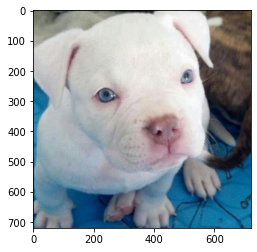

In [3]:
url = 'https://i.pinimg.com/736x/56/b1/18/56b1182de8c02093ce4038b1c3b8a580.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Comencemos con un cambio de imagen que significa mover todos los píxeles de la imagen en una dirección, como horizontal o verticalmente, manteniendo las mismas dimensiones de la imagen.

Los argumentos width_shift_range y height_shift_range del constructor ImageDataGenerator controlan la cantidad de desplazamiento horizontal y vertical respectivamente.


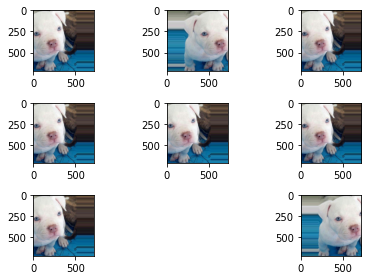

In [10]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

aplicamos zca_whitening : booleano. Aplicar blanqueamiento ZCA. 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


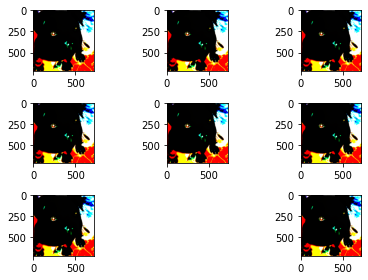

In [14]:
datagen = ImageDataGenerator(samplewise_std_normalization=True,)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

aplicamos width_shift_range=0.5,

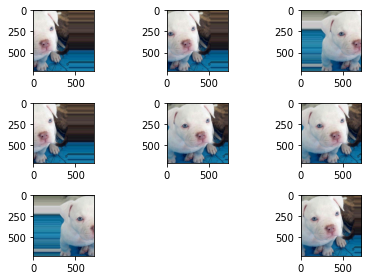

In [18]:
datagen = ImageDataGenerator(width_shift_range=0.5,) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

Se gira aleatoriamente la imagen en el sentido de las agujas del reloj un número determinado de grados de 0 a 360. Es probable que gire los píxeles fuera del marco de la imagen y deje áreas del marco sin datos de píxeles, que deban completarse.

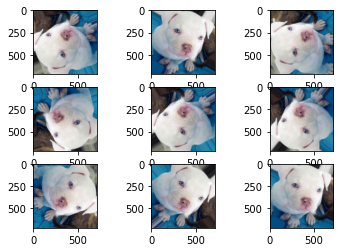

In [16]:
datagen = ImageDataGenerator(rotation_range=1500)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

La combinacion de estas tecnicas nos permite aumentar la cantidad de datos del dataset a utilizar, en muchos trabajos se utiliza una aumentacion de datos para aumentar la cantidad de imagenes de entrenamiento y mejorar la precision del trabajo.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

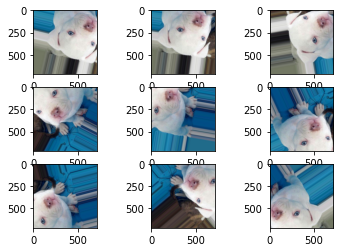

In [17]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [100,200],   
            height_shift_range           = [150,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Ahora consideramos palabras, el trabajo necesario no es tan sencillo dado la complejidad inherente del lenguaje (no podemos reemplazar cada palabra por su sinónimo e incluso si lo hacemos, corremos el riesgo de que el significado de la oración cambie completamente.
Existen algunas librerias que nos pueden ayudar a realizar esta tarea, iniciaremos analizando las siguientes:


1.   Text Attack
2.   Google Trans

# TextAttack
Es un framework de Python para ataques de adversario, entrenamiento de adversarios y aumento de datos en NLP. Nos centraremos solo en el aumento de datos.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 7.5MB/s 
     |████████████████████████████████| 153kB 22.1MB/s 
     |████████████████████████████████| 1.1MB 29.1MB/s 
     |████████████████████████████████| 317kB 40.8MB/s 
     |████████████████████████████████| 235kB 51.8MB/s 
     |████████████████████████████████| 686kB 39.2MB/s 
     |████████████████████████████████| 778kB 54.1MB/s 
     |████████████████████████████████| 1.7MB 59.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 245kB 59.8MB/s 
     |████████████████████████████████| 3.0MB 69.6MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 245kB 50.9MB/s 
     |████████████████████████████████| 17.3MB 250kB/s 
     |████████████████████████████████| 1.1MB 67.1MB/s 
     |████████████████████████████████| 890kB 63.9MB/s 
     |████████████████████████████████| 204kB 63.5MB/

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-13 17:48:50 INFO: Downloading default packages for language: en (English)...
2020-10-13 17:50:33 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Aumenta el texto reemplazándolo con sinónimos del tesauro (diccionario de sinónimos) de WordNet.

WordNet es una base de datos léxica del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos (synsets), cada uno de los cuales expresa un concepto distinto.
WordNet se parece superficialmente a un tesauro, ya que agrupa las palabras en función de su significado.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m gladiola I did?']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:15<00:00, 32.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp54hq2w1a.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I wish I had, or I’m delighted I did?']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['dill you look back on life and say, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you did back on life and say, I wish I had, or I’m glad I look?',
 'Will you look backbone on life and say, I wish I had, or I’m glad I did?',
 'Will you look back on life and, I wish I had, or I’m glad I did?',
 'Will you look beaming back on life and say, I wish I had, or I’m glad I did?']

Googletrans  utiliza la API Ajax de Google Translate para la detección y traducción de idiomas.

Los parámetros clave para el método **translate ()** son:



1.   **src**: idioma de origen. este parámetro es opcional ya que **googletrans** lo detectará.
2.   **dest**: idioma de destino. Parámetro obligatorio.

1.   **text**: el texto que se va a traducir del idioma de origen al idioma de destino. Parámetro obligatorio.





 



Al utilizar este metodo lo que ocurre es una retraduccion, pasamos del idioma original a un idioma destino y luego regresamos al original, durante esta retrotraducción, hay un ligero cambio en la oración entre el texto original y el texto retrotraducido, pero el significado general de la oración aún se conserva.

Los idiomas soportados se pueden consultar en https://cloud.google.com/translate/docs/languages?hl=es

Para obtener los mejores resultados se recomienda hacer algunas pruebas con los idiomas, si el lenguaje destino es muy similar la traduccion no pierde informacion, sin embargo se puede tener el problema de que la traduccion sea demasiado literal, esto se vuelve un poco un problema de prueba y error.


Algunos ejemplos de idiomas:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 972kB 30.9MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4fe4a6bba2ee240c21abe29373da082fb151bfbcf10580fcbd7a225ec764e7f9
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=404f5d7dec3af8c9d76b873b223687cddfd535232646100b0c1c382364618149
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
最初はうまくいかない場合は、もう一度やり直してください。
If it doesn't work at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.
